# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


<div style="border:solid grey 2px; padding: 40px">
    
**Цель исследования** - рассмотреть параметры, которые оказывают влияние на формирование рыночной стоимости.
    
***Задачи исследования:***
    
    1. Изучить данные и выполнить их предобработку.
    2. Изучить различные параметры объектов недвижимости, выявить взаимосвязи и выбивающиеся значения.
    3. Изучить время, за которое продаются квартиры.
    4. Определить факторы, которые влияют на полную стоимость объекта.
    5. Определить населённые пункты с самой высокой стоимостью квадратного метра.
    6. Понять, насколько отличаются объекты по цене в зависимости от удаления от центра.

***Согласно документации мы имеем следующие данные:***

    1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    2. balcony — число балконов
    3. ceiling_height — высота потолков (м)
    4. cityCenters_nearest — расстояние до центра города (м)
    5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    6. first_day_exposition — дата публикации
    7. floor — этаж
    8. floors_total — всего этажей в доме
    9. is_apartment — апартаменты (булев тип)
    10. kitchen_area — площадь кухни в квадратных метрах (м²)
    11. last_price — цена на момент снятия с публикации
    12. living_area — жилая площадь в квадратных метрах (м²)
    13. locality_name — название населённого пункта
    14. open_plan — свободная планировка (булев тип)
    15. parks_around3000 — число парков в радиусе 3 км
    16. parks_nearest — расстояние до ближайшего парка (м)
    17. ponds_around3000 — число водоёмов в радиусе 3 км
    18. ponds_nearest — расстояние до ближайшего водоёма (м)
    19. rooms — число комнат
    20. studio — квартира-студия (булев тип)
    21. total_area — общая площадь квартиры в квадратных метрах (м²)
    22. total_images — число фотографий квартиры в объявлении

### 1. Откроем файл с данными и изучим общую информацию

In [107]:
# Импортируем библиотеки pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# Загружаем данные
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # в переменную data сохраним данные из csv-файла
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


In [109]:
# Выведем первые 20 строчек датафрейма, запросим все атрибуты и список характерных значений
display(data.head(20))
data.info()
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [110]:
# Посмотрим, какие присутствуют названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [111]:
# Заменим некорректные названия столбцов
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest', \
                          'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

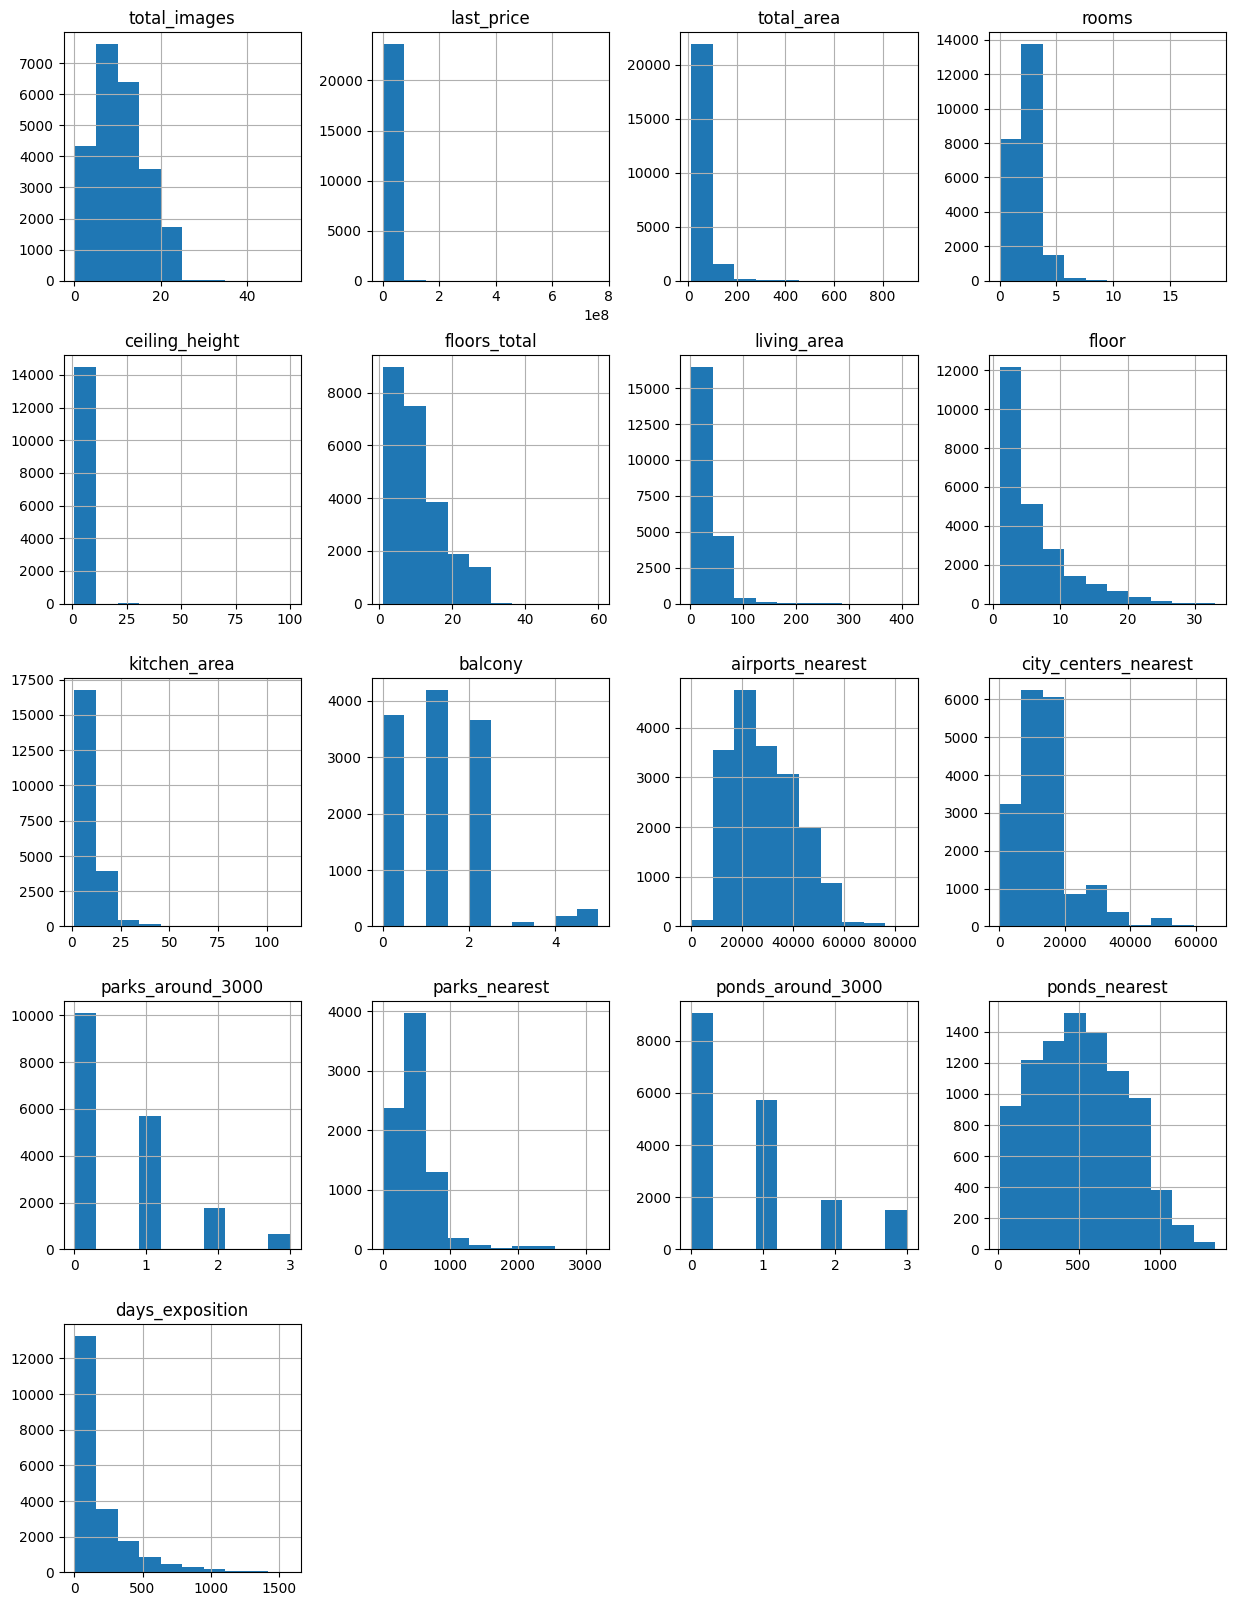

In [112]:
#Построили гистограммы для всех числовых столбцов
data.hist(figsize=(15,20));

<div style="border:solid grey 2px; padding: 40px">
Всего в датафрейме 23699 строки и 22 столбца. Видим, что в различных столбцах
присутствуют некорректные названия и пропуски. Также наблюдаем большой разброс данных.

### 2. Выполним предобработку данных

In [113]:
# Просмотрим все столбцы на наличие пропусков и их количество
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [114]:
# Пропущенные значения в %:

def pass_value_barh(dfg):
    ax = (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
        );


    plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
    plt.xlabel('Процент пропусков', fontsize=22)
    plt.ylabel('Столбцы с пропусками', fontsize=22)

    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.1,
                 str(round((i.get_width()), 1)),
                 fontsize=14,
                 color='black')

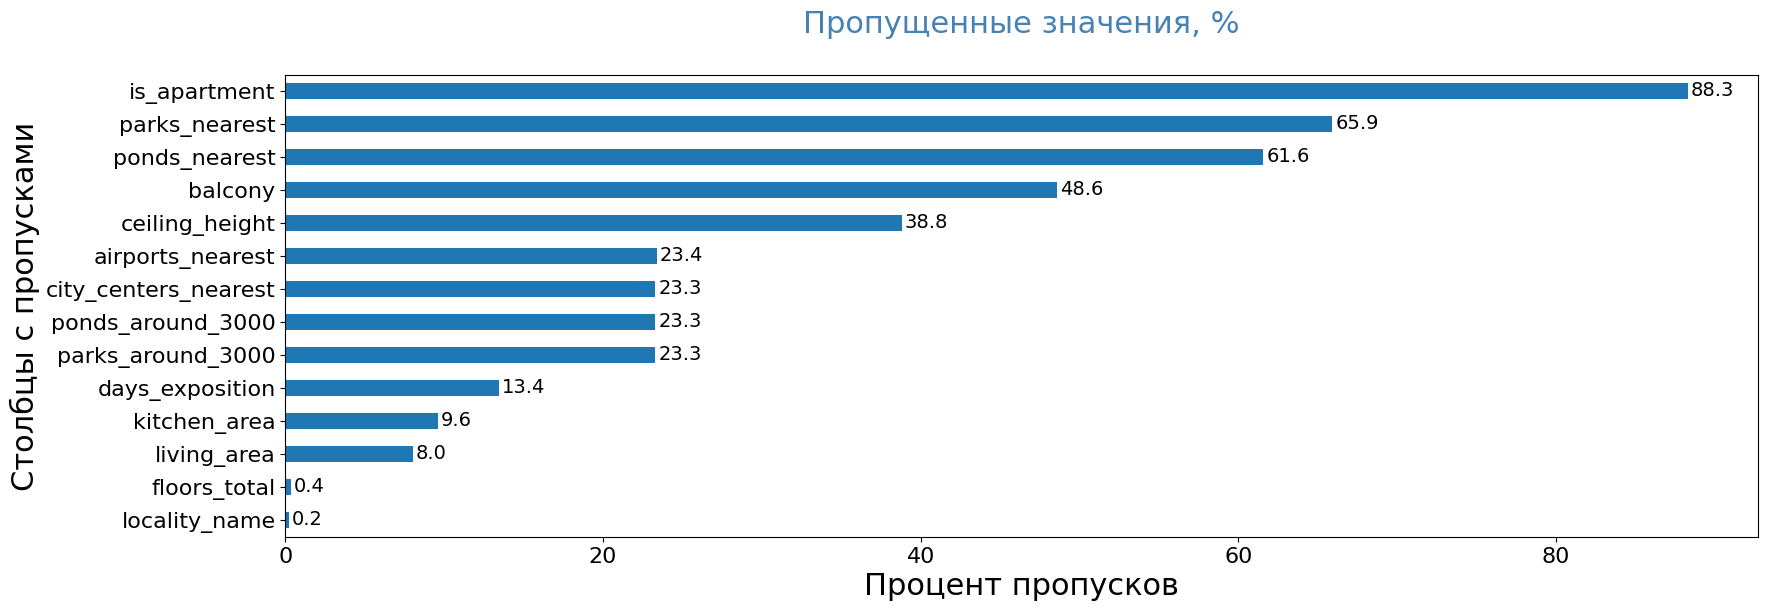

In [115]:
pass_value_barh(data)

In [116]:
# Расстояние до центра города переведём в км
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-999000)  # замена пропусков в столбце city_centers_nearest на -999
data['city_centers_nearest'] = (data['city_centers_nearest']/1000).astype(int)
data['city_centers_nearest'].head()

,city_centers_nearest
0,16
1,18
2,13
3,6
4,8


In [117]:
# Рассчитаем медианное значение высоты потолка и заполним пропуски
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data.loc[:, 'ceiling_height'].median()

In [118]:
# Посмотрим медианное значение высоты потолка в Петербурге
display(data['ceiling_height'].median())

2.65

In [119]:
# Приняли решение удалить строки с пропущенными значениями в столбцах  floors_total и locality_name
data = data.dropna(subset=['floors_total', 'locality_name'])

In [120]:
# Пропуски в столбце 'living_area' заполнили медианными значениями в зависимости от количества комнат в квартире
# Перебираем уникалиные значения количества комнат из столбца rooms
for room in data['rooms'].unique():
    #Создаём новую переменную, где соблюдаются 2 условия: в столбце 'rooms' количество
    #комнат room и есть пропуски в столбце 'living_area'
    flat=(data['rooms']==room)&(data['living_area'].isna())
    #Записываем в пробелы медианное значение living_area среди строк с текущим количеством
    #комнат room
    data.loc[flat, 'living_area']=data.loc[(data['rooms']==room), 'living_area'].median()

data['living_area'].isna().sum()

0

In [121]:
# Пропуски в столбце 'is_apartment' заполнили False
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
data['is_apartment'].isna().sum()

<ipython-input-121-74fb8fb6e166>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
<ipython-input-121-74fb8fb6e166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)


0

In [122]:
# Если на коридоры, сан.узлы и балконы отводим условно 10% площади всей квартиры, то можно рассчитать площадь кухни, имея значения общей
# площади квартиры и жилой площади. Этими данными заполнили пропуски.

data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = (
    data.loc[(data['kitchen_area'].isna()), 'total_area'] * 0.9 -
    data.loc[(data['kitchen_area'].isna()), 'living_area']
)

In [123]:
rows = data.query('total_area*0.9 > (living_area + kitchen_area)')
display(len(rows))

20841

Далее при анализе видно, что в большей части выборки площадь коридоров, сан. узлов и балконов занимает в квартирах более 10%. Можно предположить, что выделение 10% - не жёсткое требование. Также если дом относится к комфорт-классу, то только площадь сан.узлов составляет в среднем 10% площади квартиры. Значит в нашей выборке в большей части представлены квартиры с более комфортными планировками.

In [124]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,0


<div style="border:solid green 2px; padding: 40px">

В столбцах 'ceiling_height'(9195) пропуски заполнили медианными значениями.
    
В столбцах 'living_area'(1903) пропуски заполнили медианными значениями.

В столбце 'kitchen_area'(2278) заполнили значения исходя из Свода правил по строительству. 10% от общей площади сотавляет суммарная площадь сан.узла, балконов и коридора. Далее используя имеющие данные по общей площади и жилой площади нашли площадь кухни.

'is_apartment' (20924) заполнили False. Скорее всего эти данные не были заполнены, потому что в основном продают именно квартиры и при заполнении данных на этот пункт не обратили внимание.

'floors_total' (86) и 'locality_name' (49) содержат мало пропусков.  Удаление строк с этими данными не повлияет кардинально на результаты исследования.

'city_centers_nearest' (5519) заполнили заглушкой - -999.

 Пропуски в оставшихся столбцах приняли решение оставить и не вносить изменения. Большинство этих значений полученно автоматически на основе картографических данных.

In [125]:
# Отсортируем данные по уникальным значениям в алфавитном порядке для удобства анализа
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [126]:
# Посмотрим количество уникальных значений
len(data['locality_name'].unique())

364

In [127]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')  # замена всех букв ё на е

In [128]:
#Используем функцию replace, чтобы заменить список из названий
data['locality_name'] = (
    data['locality_name'].
    replace(['городской поселок', 'коттеджный поселок', 'поселок   городского типа',\
             'поселок городского типа','садоводческое некоммерческое товарищество',\
             'садовое товарищество', 'поселок имени', 'поселок при железнодорожной станции'],\
            'посёлок', regex=True)
)


In [129]:
data['locality_name'] = data['locality_name'].replace('поселок', 'посёлок', regex=True)

In [130]:
#Посмотрим количество уникальных значений, которое осталось после обработки.
len(data['locality_name'].unique())

319

In [131]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

В ходе анализа выявили 364 уникальных значения. Видно, что одно и тоже название повторяется в разных вариациях написания. После устранения неявных дубликатов в выборке осталось 319 уникальных значений. Можно было бы заменить все деревни и посёлки на пустые значения. Но было принято решение оставить с более полними названиями, на тот случай, если будет необходимость посчитать какие-то параметры только для посёлков и деревень отдельно.

In [132]:
# Исследование выворки на простое дублирование записей
display(data.duplicated().sum())

0

In [133]:
# Посмотрим выборку на наличие дубликатов по сумме ключевых параметров
display(data.duplicated(['total_area', 'floor', 'floors_total', 'city_centers_nearest', 'locality_name', 'rooms']).sum())

1017

In [134]:
# Удалим дубликаты по сумме ключевых параметров
data = data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'city_centers_nearest', 'locality_name', 'rooms'])

In [135]:
# Проверим, что дубликатов не осталось
display(data.duplicated(['total_area', 'floor', 'floors_total', 'city_centers_nearest', 'locality_name', 'rooms']).sum())


0

In [136]:
# Заменим пустые значения на 0
fillna_o = ['balcony', 'parks_around_3000', 'ponds_around_3000']
for f in fillna_o:
    data.loc[:,f]=data.loc[:,f].fillna(0)

In [137]:
# Приведём ряд столбцов к целочисленному типу
type_int = ['balcony', 'floors_total', 'parks_around_3000', 'ponds_around_3000', 'last_price']
for t in type_int:
    data.loc[:,t]=data.loc[:,t].astype('int')

In [138]:
# Переведём строчные значения в даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [139]:
# Проверим ещё раз типы данных
data.dtypes

,0
total_images,int64
last_price,float64
total_area,float64
first_day_exposition,datetime64[ns]
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
is_apartment,bool


<div style="border:solid grey 2px; padding: 40px">

Всего в таблице 22 столбца. Пропуски значений были в 14 из них.

Более всего из столбцов, в которых заполнили пропуски, не было значений в столбцах is_apartment (90%), balcony (50%), ceiling_height (40%). Для устранения пропусков были использованы различные варианты, максимально подходящие для каждого отдельного случая.

Пропусков из автоматически полученных данных тоже оказалось достаточно много: parks_nearest
(70%), ponds_nearest (65%), airports_nearest (25%). Стоит обратить внимание и доработать систему, чтобы она подтягивала больше данных.

Менее всего пропусков оказалось living_area и floors_total (1-2%). Приняли решение их удалить.

Также была проведена работа по устранению явнях дубликатов. Изначально уникальных значений в
столбце locality_name было 364. А после выявления выборка сократилась до 319.

Исследовали выборку на простое дублирование записей. Дубликаты не были выявлены. Тогда углубились и посмотрели дубликаты по сумме ключевых параметров: общ. площадь квартиры, этаж,
общая этажность дома, расстояние до центра, название населенного пункта, количество комнат. Нашли 1017 повторяющихся строк. Удалили.

### 3. Добавьте в таблицу новые столбцы

In [140]:
# Добавляем в таблицу столбик со стоимостью 1 квадратного метра каждой квартиры
data['one_meter_price'] = (data['last_price']/data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8,2.0,112.0,1.0,48.0,121.0,100000.00


In [141]:
# Добавляем в таблицу столбцы - день недели, месяца, года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [142]:
# Создадим сначала функцию, которая по номеру этажа будет возвращать тип этажа (первый, последний, другой)

def floor_flat(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [143]:
# Добавляем в таблицу столбец с типом этажа

data['floors_type'] = data.apply(floor_flat, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,weekday,month,year,floors_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


In [144]:
# Проведём проверку на наличие возможных нулевых или отрицательных значений этажей,
# потому что все подобные записи попадут в категорию средних этажей
index = data["floor"] <= 0
filtered_data = data[index]
print(len(filtered_data))

0


### 4. Проведём исследовательский анализ данных

**1. Параметр площадь**

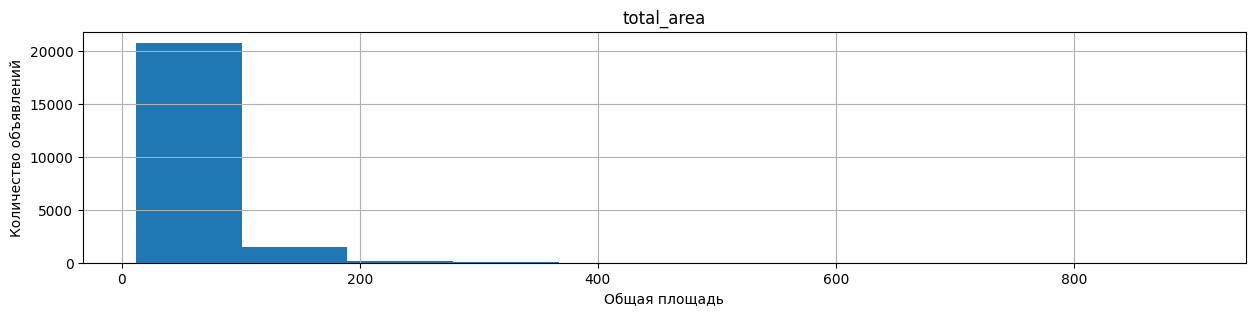

Какие квартиры наибольших по площади:


,total_area
19540,900.0
12859,631.2
3117,631.0
15651,618.0
5358,590.0
4237,517.0
8018,507.0
15016,500.0
5893,500.0
12401,495.0


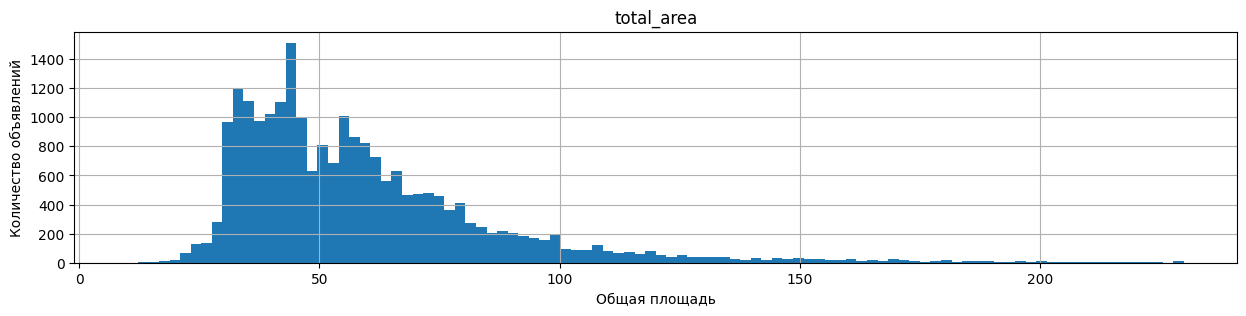

In [145]:
data['total_area'].hist(figsize = (15,3))
plt.title('total_area')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()
data['total_area'].hist(bins=100, figsize = (15,3), range=(10,230))
plt.title('total_area')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')

print('Какие квартиры наибольших по площади:')
display(data['total_area'].sort_values(ascending=False).head(10))

(0.0, 130.0)

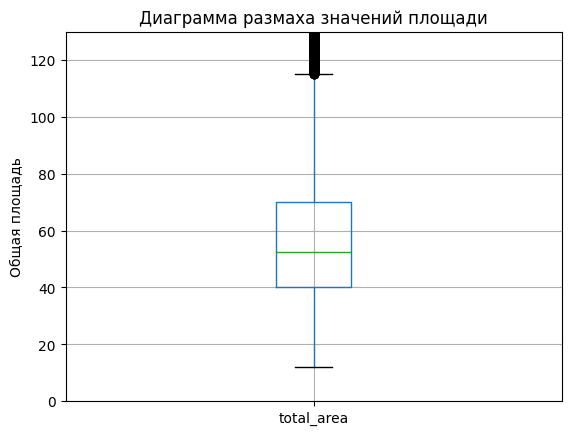

In [146]:
data.boxplot(['total_area'])
plt.title('Диаграмма размаха значений площади')
plt.ylabel('Общая площадь')
plt.ylim(0,130)

In [147]:
len(data.query('total_area>110'))

1344

In [148]:
len(data.query('total_area>180'))

307

In [149]:
# Удалим выбросы, у которых площадь квартир превышает 180 квадратных метров
data = data.query('total_area<180')

In [150]:
# Посмотрим, какое количество строк осталось в датафрейме
data.shape[0]

22235

<div style="border:solid green 2px; padding: 40px">  
  На первой гистаграмме видно, что очень большой разброс квартир по площади.
Максимальное значение достигает 900 м². Мы построили диаграмму размаха,
по которой видно, что нормальные значения лежат в диапазоне от 10 до 110 м².
  
  Если посчитать количество выбросов, то получается довольно внушительная цифра - 1031. Удалять столько строчек с информацмей из датафрейма, может пагубно сказаться на дальнейших расчётах. Поэтому удалим только самые крайние выбросы - 307.


**2. Параметр жилая площадь**

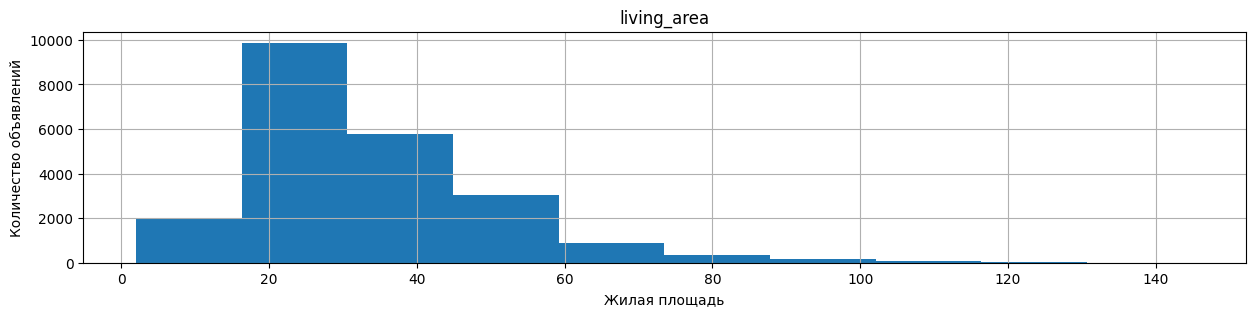

Наибольшие по жилой площади квартиры:


,living_area
14603,145.0
13729,140.0
12549,140.0
18164,128.0
5711,127.7
15647,126.6
417,126.6
1813,126.4
2261,125.9
15692,125.5


Наименьшие по жилой площади квартиры:


,living_area
13915,2.0
21758,2.0
3242,3.0
23574,3.0
17582,5.0
21943,5.4
16431,6.0
19251,6.5
23208,8.0
20994,8.0


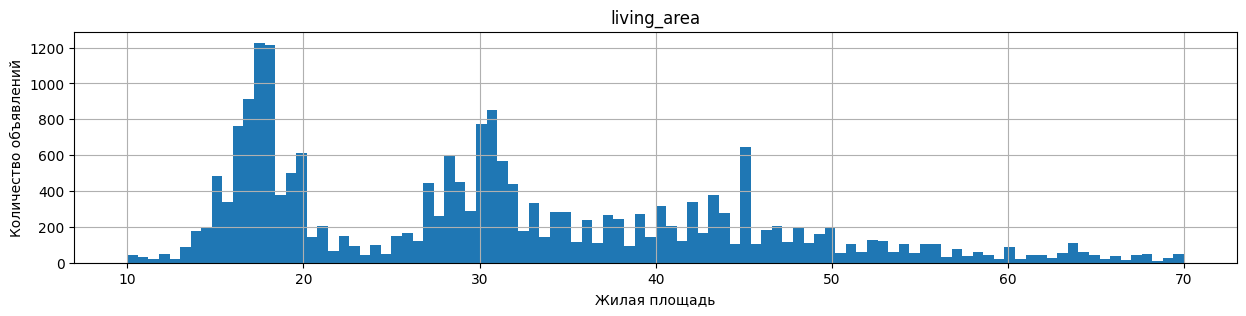

In [151]:
data['living_area'].hist(figsize = (15,3))
plt.title('living_area')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()
data['living_area'].hist(bins=100, range=(10,70), figsize = (15,3))
plt.title('living_area')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')

print('Наибольшие по жилой площади квартиры:')
display(data['living_area'].sort_values(ascending=False).head(10))
print('Наименьшие по жилой площади квартиры:')
display(data['living_area'].sort_values().head(10))

(0.0, 90.0)

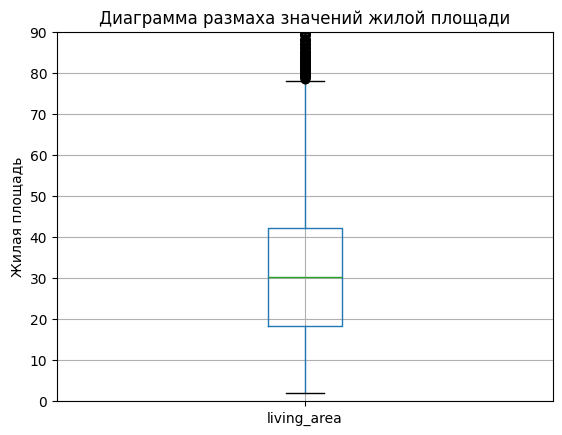

In [152]:
data.boxplot(['living_area'])
plt.title('Диаграмма размаха значений жилой площади')
plt.ylabel('Жилая площадь')
plt.ylim(0,90)

In [153]:
len(data.query('living_area<6 or living_area>85'))

344

In [154]:
# Уберём строки, в которых площадь квартиры менее 6 квадратных метров и более 85
data = data.query('living_area>6 and living_area<85')
len(data.query('living_area<6 or living_area>85'))

0

In [155]:
# Контроль строк
data.shape[0]

21878

На гистограмме наблюдается несколько пиков. Они нам рассказывают, что много кваритир с жилой площадью 18-19 м². Это скорее всего однокомнатные квартиры. Их всегда продают много. Похоже на правду. Следующий пик призодится на 30 м². Это скорее всего двушки. Что тоже соответствует действительности. И на третьем месте скорее всего трёхкомнатные (небольшоно размера в старом фонде) или евродвушки - 46 м².
    
Так же из диаграммы размаха и выборки по квартирам, с наименьшей жилой площадью, мы делаем вывод, что выбросы есть. Удалим все строки с квартирами менее 6 метров и более 85 метров. Всего таких данных - 344 строки.

**3. Параметр площадь кухни**

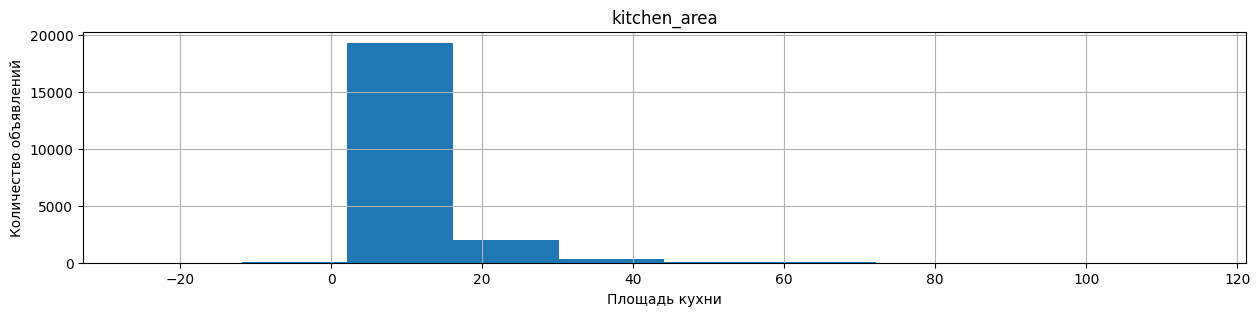

Квартиры с самыми маленькими кухнями:


,kitchen_area
13034,-25.85
20102,-25.85
9964,-19.10
17472,-18.65
17083,-18.65
18655,-10.55
22306,-8.10
16672,-8.03
13006,-7.85
11977,-7.85


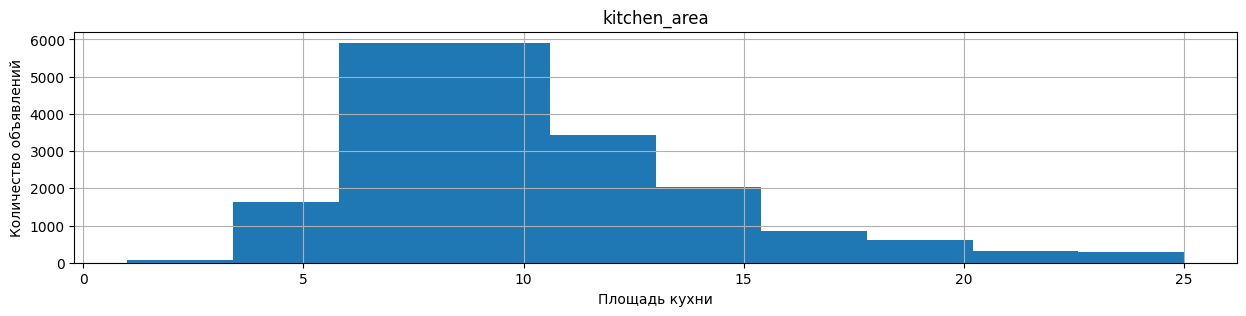

In [156]:
data['kitchen_area'].hist(figsize = (15,3))
plt.title('kitchen_area')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()
data['kitchen_area'].hist(range=(1,25), figsize = (15,3))
plt.title('kitchen_area')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')

print('Квартиры с самыми маленькими кухнями:')
display(data['kitchen_area'].sort_values().head(10))

(-10.0, 25.0)

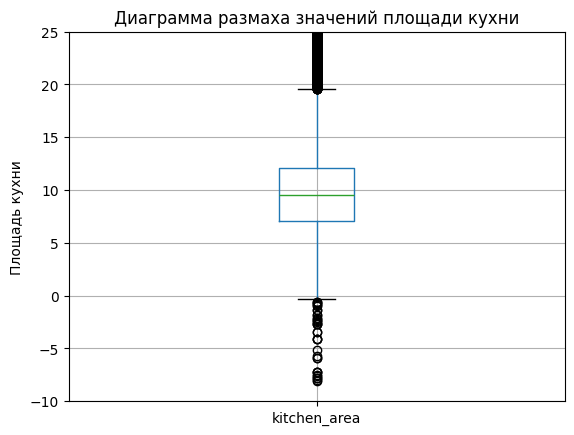

In [157]:
data.boxplot(['kitchen_area'])
plt.title('Диаграмма размаха значений площади кухни')
plt.ylabel('Площадь кухни')
plt.ylim(-10,25)

In [158]:
# Избавимся от отрицательных значений
data['kitchen_area'] = data['kitchen_area'].abs()

In [159]:
len(data.query('kitchen_area<3 or kitchen_area>20'))

1490

In [160]:
data = data.query('kitchen_area>3 and kitchen_area<40')
len(data.query('kitchen_area<3 or kitchen_area>40'))

0

   Из гистаграммы видно, что у большинства квартир площадь кухонь составляет 6-12 м².
    
   У площади кухонь большой выброс в обе строны. Заменим отрицательные значения площади на положительные. Сократим только самые большие значения (кухни с площадью более 40 метров квадратных). А так же уберём значения кухни менее 3х метров. Потому что даже в студиях или свободных планировках кухонный островок будет присутствовать.

4. Параметр цена объекта

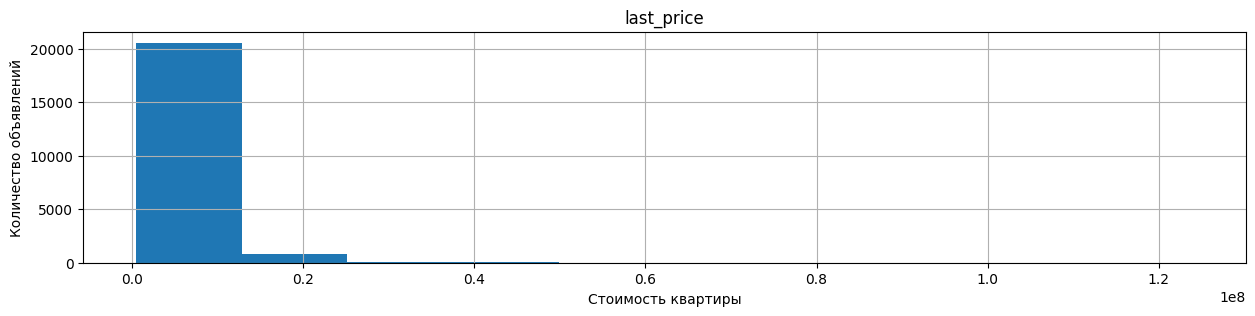

Самые дорогие квартиры:


,last_price
4996,124000000.0
10362,83820000.0
6462,82000000.0
5232,77612080.0
13919,65000000.0
19151,63900000.0
13685,55845000.0
1944,55800000.0
2123,54000000.0
10011,53000000.0


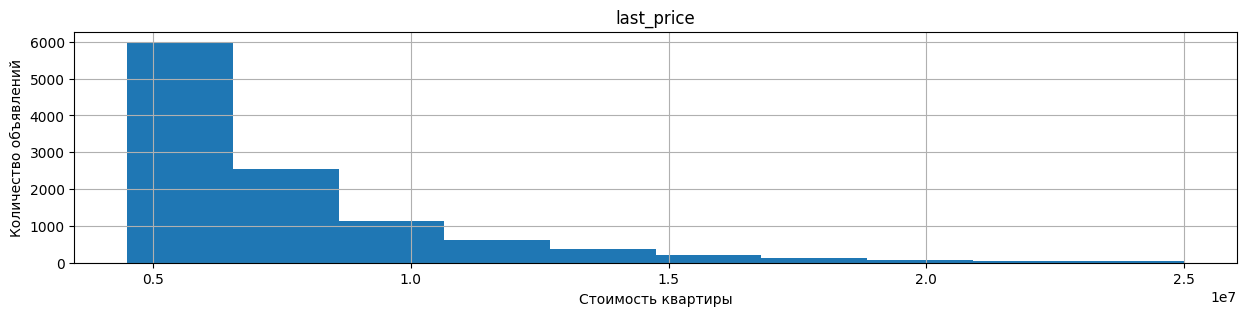

In [161]:
data['last_price'].hist(figsize = (15,3))
plt.title('last_price')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')
plt.show()
data['last_price'].hist(range=(4500000,25000000), figsize = (15,3))
plt.title('last_price')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')

print('Самые дорогие квартиры:')
display(data['last_price'].sort_values(ascending=False).head(10))

(0.0, 15000000.0)

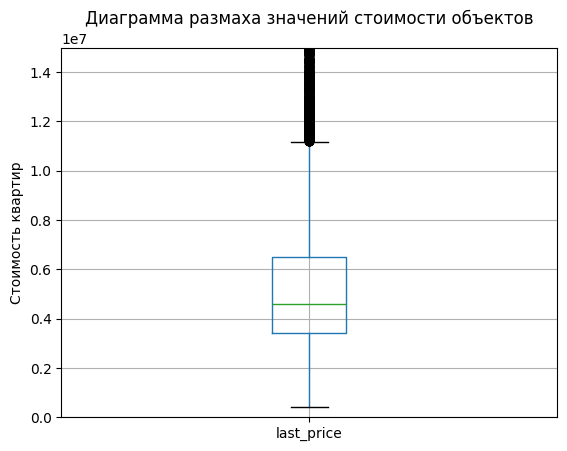

In [162]:
data.boxplot(['last_price'])
plt.title('Диаграмма размаха значений стоимости объектов')
plt.ylabel('Стоимость квартир')
plt.ylim(0,15000000)

In [163]:
len(data.query('last_price>12000000'))

1149

In [164]:
data = data.query('last_price<20000000')

In [165]:
# Контроль строк
data.shape[0]

21278


Основная стоимость квартир лежит в диапазоне от 4500000 до 8000000 руб.
    
У цены квартир большой разброс. Сразу удалять столько строк нецелесообразно. Подчистим только самые высокие значения (свыше 20000000 руб) - 303 строки.

**5. Параметр количество комнат**

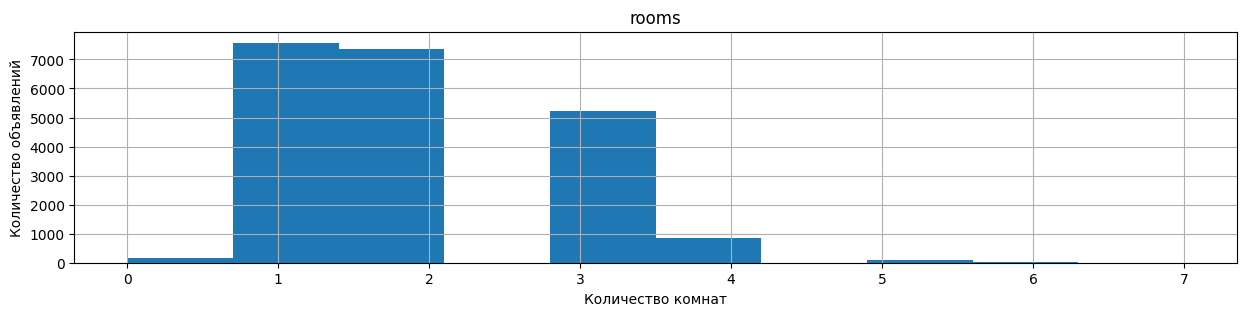

Квартиры с самым большим количеством комнат:


,rooms
17991,7
23555,7
2017,6
9856,6
22122,6
21218,6
12487,6
23047,6
14510,6
3324,6


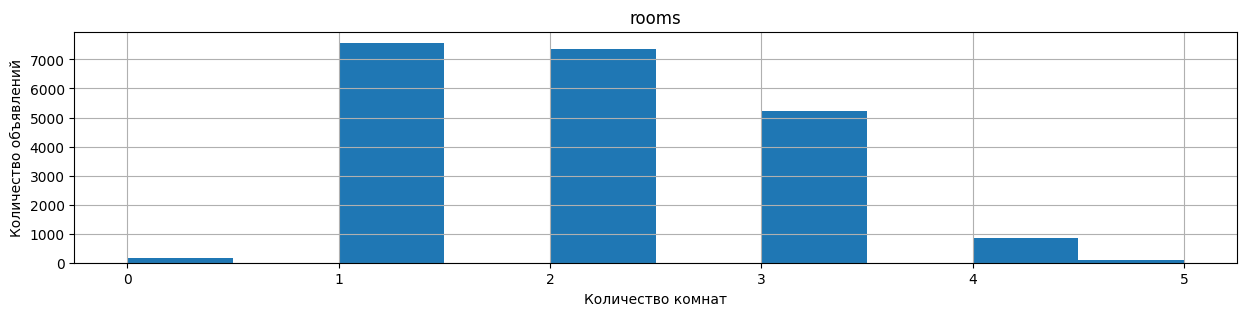

In [166]:
data['rooms'].hist(figsize = (15,3))
plt.title('rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
data['rooms'].hist(range=(0,5), figsize = (15,3))
plt.title('rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

print('Квартиры с самым большим количеством комнат:')
display(data['rooms'].sort_values(ascending=False).head(10))

(-1.0, 8.0)

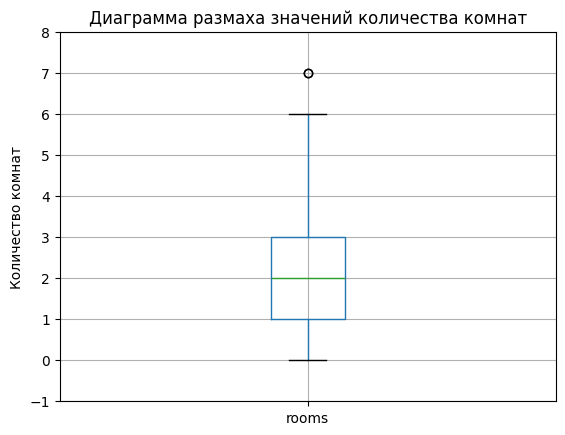

In [167]:
data.boxplot(['rooms'])
plt.title('Диаграмма размаха значений количества комнат')
plt.ylabel('Количество комнат')
plt.ylim(-1, 8)

In [168]:
len(data.query('rooms==0'))

158

In [169]:
# Удалим квартиры, у которых количество комнат равно 0
data = data.query('rooms!=0')

На гистограмме видно, что больше всего продалось однокомнатных и двухкомнатных квартир.
Почти поровну.

А так же есть квартиры, в которых указано, что комнат нет. Такого быть не может. Скорее всего это просто ошибка. Таких квартир 193. Удалили их.

**6. Параметр высота потолков**

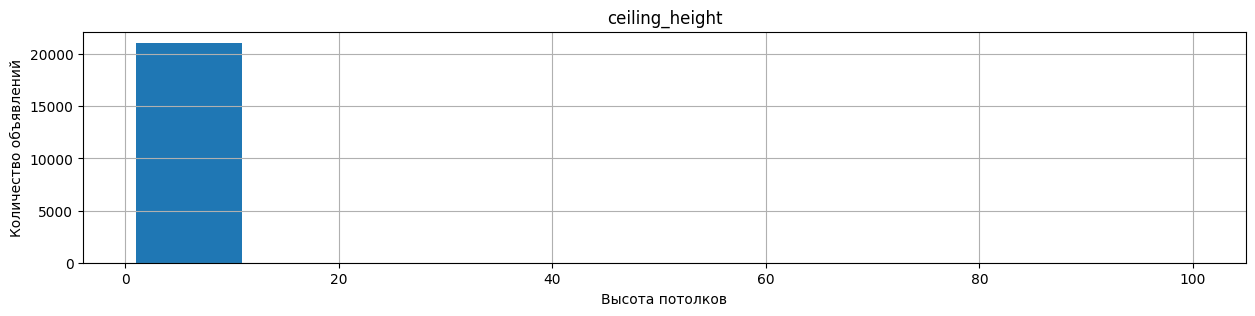

Квартиры с самыми высокими потолками:


,ceiling_height
22869,100.0
22336,32.0
3148,32.0
21377,27.5
22938,27.0
5807,27.0
5246,27.0
10773,27.0
20478,27.0
17857,27.0


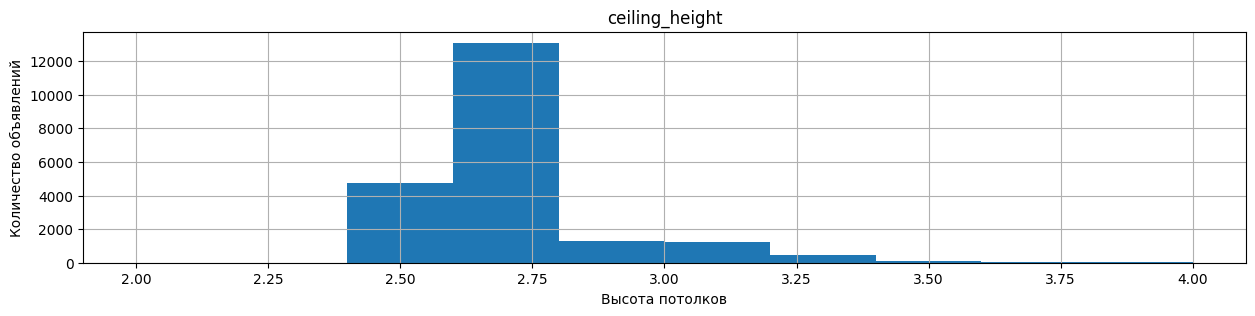

In [170]:
data['ceiling_height'].hist(figsize = (15,3))
plt.title('ceiling_height')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

data['ceiling_height'].hist(range=(2, 4), figsize = (15,3))
plt.title('ceiling_height')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')

print('Квартиры с самыми высокими потолками:')
display(data['ceiling_height'].sort_values(ascending=False).head(10))

In [171]:
#Предположили, что значения с высотой потолка в 25, 32 метра - это на самом деле вещественные значения 2,5 и 3,2 метра. Напишеи функцию,
#которая выведет корректные данные по высоте потолка.

def ceiling_height_normal(ceiling):
    if ceiling>=10:
        return ceiling/10
    else:
        return ceiling

data['ceiling_height']=data['ceiling_height'].apply(ceiling_height_normal)

In [172]:
print('Квартиры с самыми высокими потолками:')
display(data['ceiling_height'].sort_values(ascending=False).head(10))

Квартиры с самыми высокими потолками:


,ceiling_height
22869,10.0
5863,8.3
3474,8.0
15743,8.0
17442,8.0
12628,5.3
1053,5.0
2802,4.8
19142,4.7
6802,4.5


(2.25, 4.0)

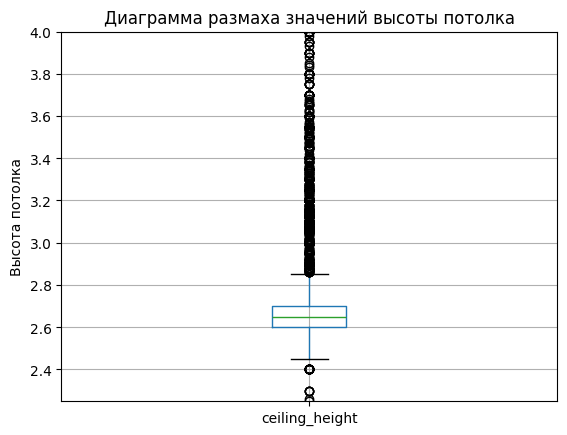

In [173]:
data.boxplot(['ceiling_height'])
plt.title('Диаграмма размаха значений высоты потолка')
plt.ylabel('Высота потолка')
plt.ylim(2.25, 4)

In [174]:
len(data.query('ceiling_height>5 or ceiling_height<2.4'))

30

In [175]:
data = data.query('ceiling_height<5 and ceiling_height>2.4')
len(data.query('ceiling_height>5 or ceiling_height<2.4'))

0

In [176]:
# Контроль строк
data.shape[0]

21067

Основная масса квартир имеет потолок от 2,58 до 2,75 м.

Так же есть аномально высокие потолки - 100м, 32м, 27м. 32 и 37 метров - скорее всего
изначально вещественные числа 3,2м и 2,7м. Чтобы исправить неточность напишем функцию,
которая на выходе даст корректные данные.

Поскольку исследование проходит в г. Санкт-Петербурге, то высота потолков квартир
в исторической части города может достигать 5м, поэтому удалим из таблицы только те потолки,
которые более 5 метров.
    
Высота потолка 2,4 метра считается минимальной для комфортного проживания. Поэтому всё, что ниже мы удалим.

**7. Параметр тип этажа квартиры**

Text(0, 0.5, 'Количество объявлений')

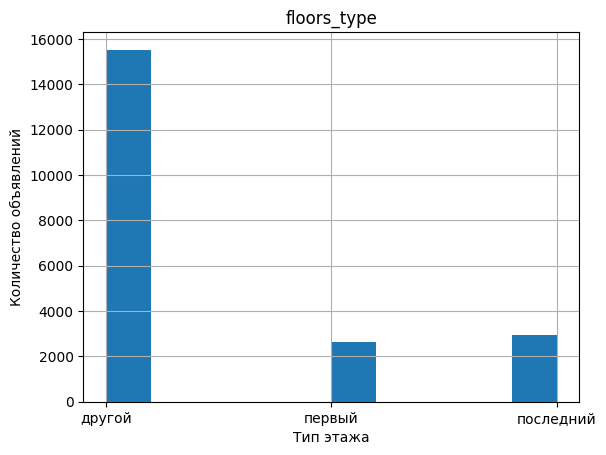

In [177]:
data['floors_type'].hist();
plt.title('floors_type')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')

Квартиры на первом и последнем этаже в продаже встречаются реже. Что очень логично.

**8. Параметр общее количество этажей в доме**

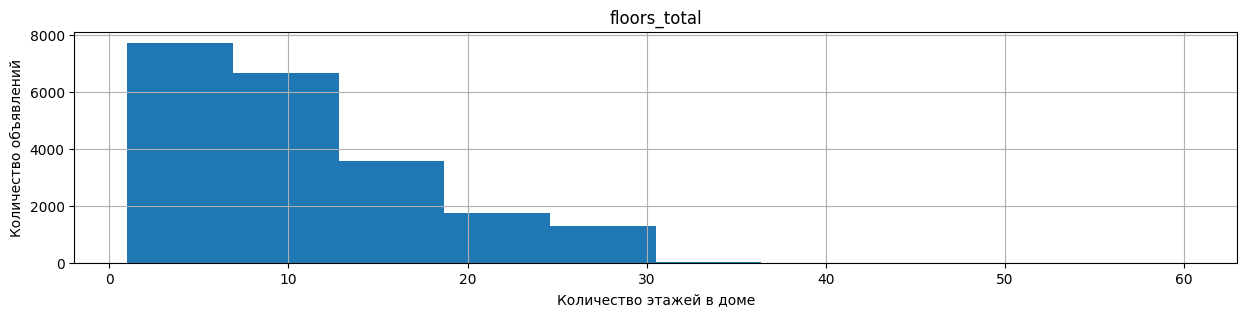

Самые высокие дома:


,floors_total
2253,60.0
16731,52.0
397,36.0
5807,36.0
11079,36.0
12888,35.0
14347,35.0
9370,35.0
2966,35.0
18617,35.0


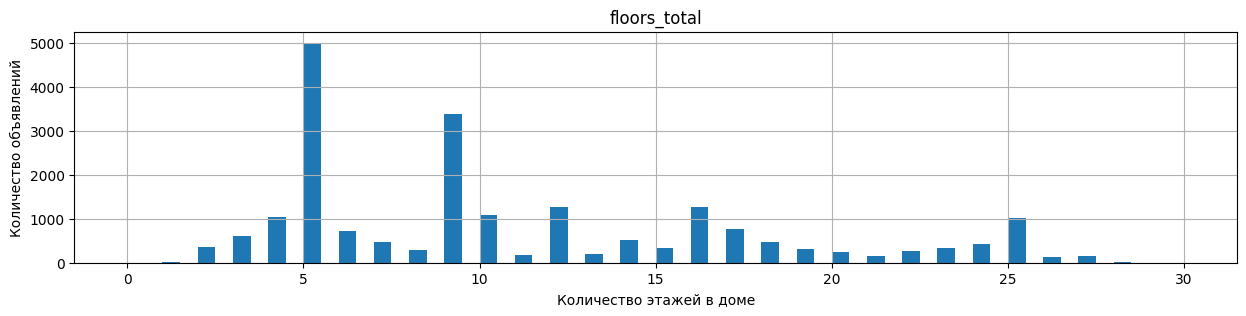

In [178]:
data['floors_total'].hist(figsize = (15,3))
plt.title('floors_total')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()
data['floors_total'].hist(bins=60, range=(0,30), figsize = (15,3))
plt.title('floors_total')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')

print('Самые высокие дома:')
display(data['floors_total'].sort_values(ascending=False).head(10))

(0.0, 30.0)

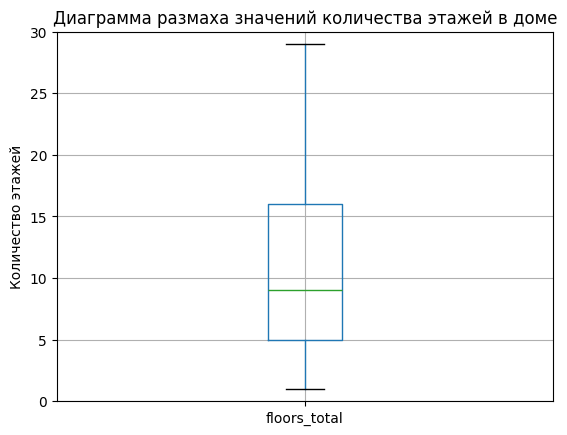

In [179]:
data.boxplot(['floors_total'])
plt.title('Диаграмма размаха значений количества этажей в доме')
plt.ylabel('Количество этажей')
plt.ylim(0, 30)

In [180]:
len(data.query('floors_total>30'))

29

In [181]:
data = data.query('floors_total<30')


Больше всего квартир продаётся в пятиэтажных домах, далее в девятиэтажных. Скорее всего большинство из них относится к вторичному фонду. Потому что новостройки в основном от 10-15 этажей. Среди высоток - более всего квартир продаётся в 25 этажных домах. Наверное, по г. Санкт-Петербургу их строят чаще, чем дома, высотой 30 этажей.
    
К выбросам отнесём все дома, выше 30 этажей. Удалили их.

**9. Параметр расстояние до цетра города**

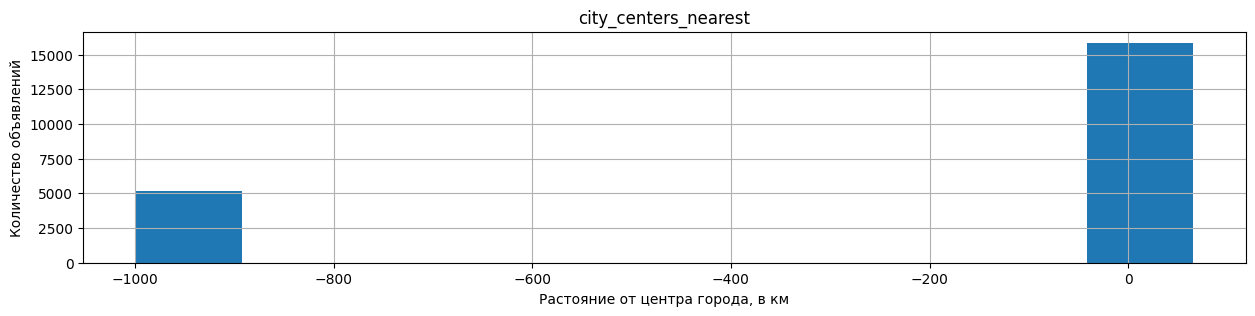

Самые дальние по расположению квартиры от центра города:


,city_centers_nearest
577,65
5340,65
9640,65
20746,65
5218,64
2974,62
18884,62
16569,61
23123,60
11244,59


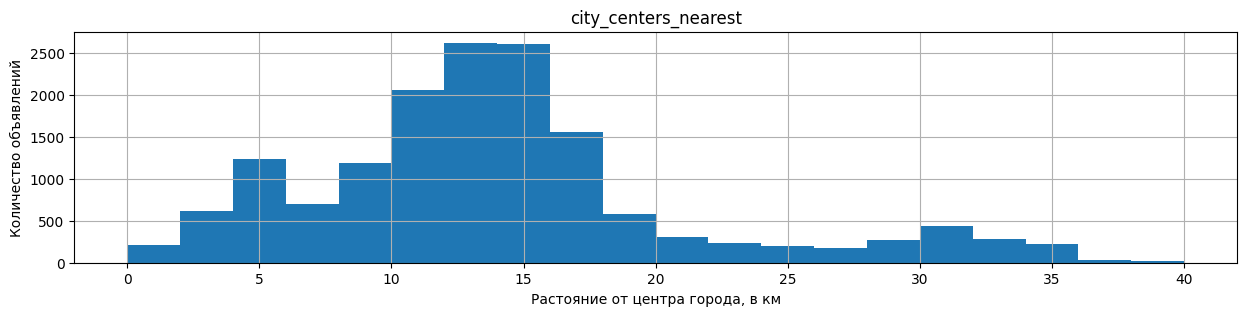

In [182]:
data['city_centers_nearest'].hist(figsize = (15,3))
plt.title('city_centers_nearest')
plt.xlabel('Растояние от центра города, в км')
plt.ylabel('Количество объявлений')
plt.show()
data['city_centers_nearest'].hist(bins=20, range=(0,40), figsize = (15,3))
plt.title('city_centers_nearest')
plt.xlabel('Растояние от центра города, в км')
plt.ylabel('Количество объявлений')

print('Самые дальние по расположению квартиры от центра города:')
display(data['city_centers_nearest'].sort_values(ascending=False).head(10))

(-5.0, 40.0)

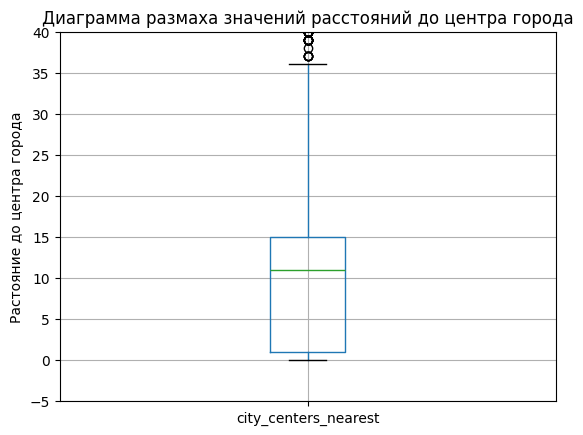

In [183]:
data.boxplot(['city_centers_nearest'])
plt.title('Диаграмма размаха значений расстояний до центра города')
plt.ylabel('Растояние до центра города')
plt.ylim(-5, 40)

In [184]:
len(data.query('city_centers_nearest>30'))

1026

Более всего продаваемых квартир расположено от центра города на растоянии 10-18 км.
А вообще разброс большой - доходит до 65 км до центра. Можно предположить, что такое
возможно. Потому что к городу относится, напримар, Павловск, Кронштадт. А это большие
расстояния. Никаких изменений в выборку не вносили.

**10. Параметр расстояние до ближайшего парка**

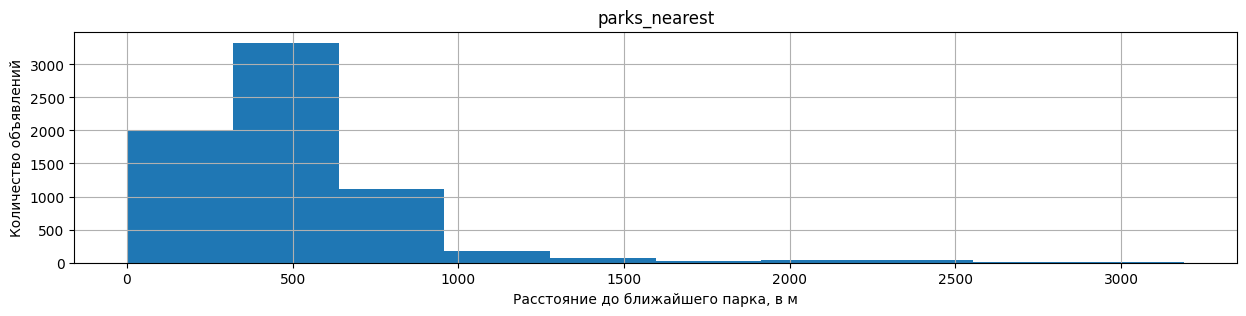

Квартиры, от которых парк дальше всего:


,parks_nearest
19430,3190.0
1590,3064.0
2659,2905.0
7855,2880.0
3865,2847.0
22003,2768.0
7316,2747.0
5923,2711.0
6625,2633.0
18327,2555.0


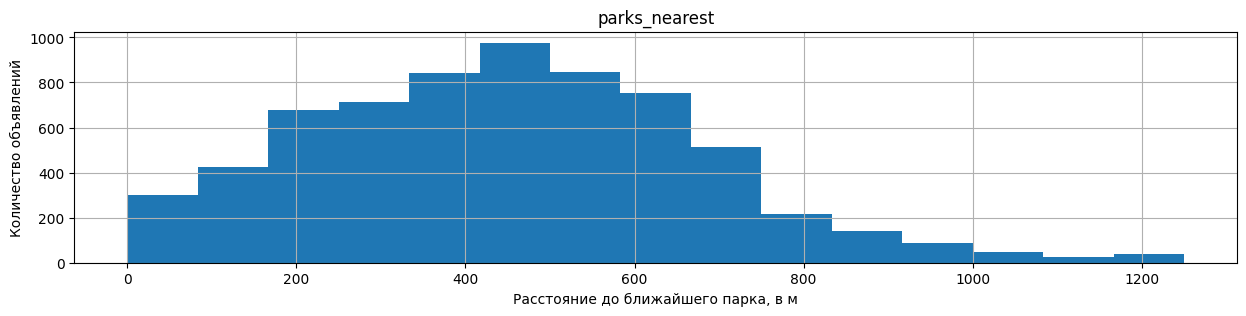

In [185]:
data['parks_nearest'].hist(figsize = (15,3))
plt.title('parks_nearest')
plt.xlabel('Расстояние до ближайшего парка, в м')
plt.ylabel('Количество объявлений')
plt.show()
data['parks_nearest'].hist(bins=15, range=(0,1250), figsize = (15,3))
plt.title('parks_nearest')
plt.xlabel('Расстояние до ближайшего парка, в м')
plt.ylabel('Количество объявлений')

print('Квартиры, от которых парк дальше всего:')
display(data['parks_nearest'].sort_values(ascending=False).head(10))

(-50.0, 1200.0)

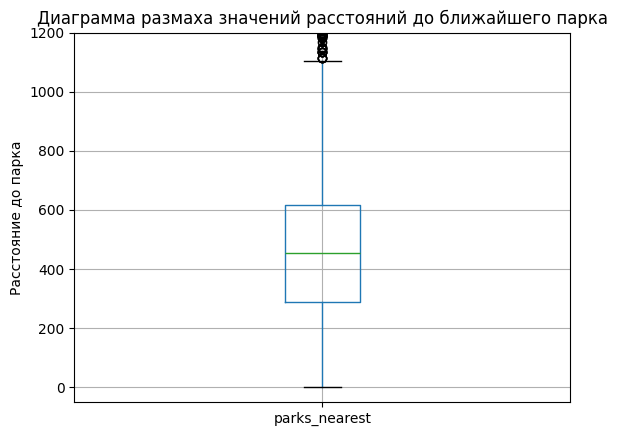

In [186]:
data.boxplot(['parks_nearest'])
plt.title('Диаграмма размаха значений расстояний до ближайшего парка')
plt.ylabel('Расстояние до парка')
plt.ylim(-50, 1200)

In [187]:
len(data.query('parks_nearest>1200'))

235

У большинсва кваритир, по которым мы получили автоматически данные из геосервисов, парк находится в пешей дрступности 300-600 м. Разброс значений тоже
выглядит адекватным. Вносить изменения не будем.

In [188]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,weekday,month,year
count,21038.000000,2.103800e+04,21038.000000,21038,21038.000000,21038.000000,21038.000000,21038.000000,21038.000000,21038.000000,...,21038.000000,21038.000000,6813.000000,21038.000000,7777.000000,18317.000000,21038.000000,21038.000000,21038.000000,21038.000000
mean,9.851079,5.312594e+06,55.563940,2017-11-15 04:21:19.969578752,1.987214,2.684234,10.844044,31.612817,5.935403,10.523263,...,-235.362725,0.435830,492.930721,0.556754,526.032017,177.064530,94676.077632,2.571442,6.395427,2017.384780
min,0.000000,4.300000e+05,13.000000,2014-11-27 00:00:00,1.000000,2.450000,1.000000,6.500000,1.000000,3.020000,...,-999.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7962.960000,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-19 00:00:00,1.000000,2.600000,5.000000,18.200000,2.000000,7.100000,...,1.000000,0.000000,288.000000,0.000000,304.000000,44.000000,75245.815000,1.000000,3.000000,2017.000000
50%,9.000000,4.570000e+06,51.000000,2017-12-16 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.400000,...,11.000000,0.000000,456.000000,0.000000,510.000000,93.000000,94106.780000,3.000000,6.000000,2017.000000
75%,14.000000,6.450000e+06,66.700000,2018-08-29 18:00:00,3.000000,2.700000,16.000000,41.000000,8.000000,12.000000,...,15.000000,1.000000,616.000000,1.000000,734.000000,226.000000,112205.200000,4.000000,10.000000,2018.000000
max,50.000000,1.999900e+07,178.300000,2019-05-03 00:00:00,7.000000,4.800000,29.000000,84.600000,27.000000,39.900000,...,65.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,392354.120000,6.000000,12.000000,2019.000000
std,5.605337,2.988619e+06,20.726915,NaN,0.906987,0.193137,6.600935,14.069587,4.899315,4.938329,...,436.630371,0.718192,340.829534,0.854810,277.291791,215.133956,32853.231425,1.792991,3.488765,1.027136


В датафрейме отброшены редкие и выбившиеся значения. Теперь его данные выглядят более корректно для анализа.

### Скорость продажи квартиры

,days_exposition
count,18317.000000
mean,177.064530
std,215.133956
min,1.000000
25%,44.000000
50%,93.000000
75%,226.000000
max,1580.000000


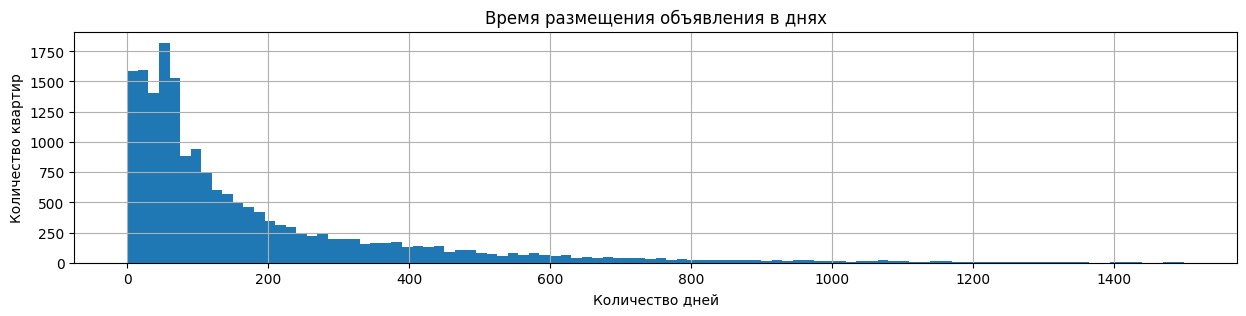

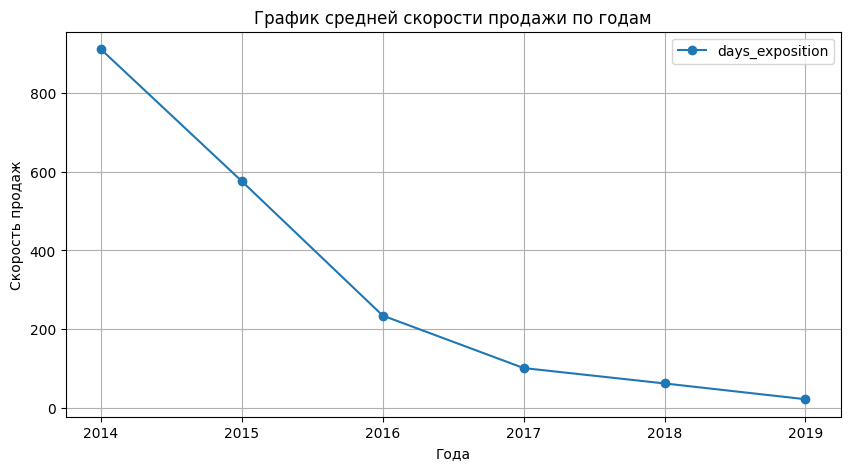

In [189]:
#Чтобы в рассчётах не возникло ошибок, поставим заглушку.
#Поскольку ранее этот столбец оставили с пропусками
data['days_exposition'] = data['days_exposition'].fillna(value=-555)

data['days_exposition'].hist(bins=100, range=(0,1500), figsize = (15,3))
plt.title('Время размещения объявления в днях')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
data_1 = data.query('days_exposition>0')
display(data_1['days_exposition'].describe())

year_days_exposition = data_1.pivot_table(index='year', values='days_exposition', aggfunc='median')
year_days_exposition.plot(grid=True, style='o-', figsize=(10, 5))
plt.title('График средней скорости продажи по годам')
plt.xlabel('Года')
plt.ylabel('Скорость продаж')
plt.show()


In [190]:
len(data.query('days_exposition>1095'))

131

In [191]:
data = data.query('days_exposition<1095')
len(data.query('days_exposition>1095'))

0

Обычно продажа квартир занимает примерно 93 дня. Это значение мы взяли из медианы.
Считаем его более корректным, поскольку выбросы и разные аномалии на него действуют меньше,
чем на среднее арифметическое (которое равно 177 дней).

Быстрыми можно считать подажи до 1 квартиля - в течение 40 дней. К необычно долгим можно
отнести продажи более 225 дней.
    
Посмотрели, количество квартир, которые продаются более 3 лет. Все значения, которые выше - удалили.
Предположили, что у кого продаются квартиры от года до 3х лет не стремятся к быстрой продаже, может их интересует больше цена сделки.
    
Так же построили график средней скорости продаж по годам. По нему чётко видно, что с каждым годом медианное время продажи сокращалось. Может быть это связано с улучшениями на платформах продаж или увеличением количества самих платформ. Людям проще найти то, что необходимо. Так же возможно, многие решили в эти года вложиться в недвижимость. Поэтому выкупали быстрее, а не ждали лучшего момента. Может подтолкнули какие-то гос. программы к покупке жилья.


### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

**1. Зависимость цены от общей площади**

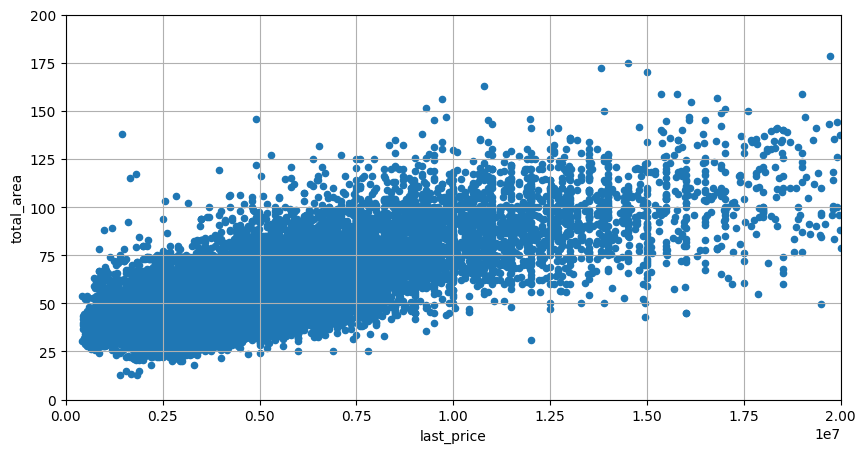

Корреляция цены и площади квартиры:


0.75

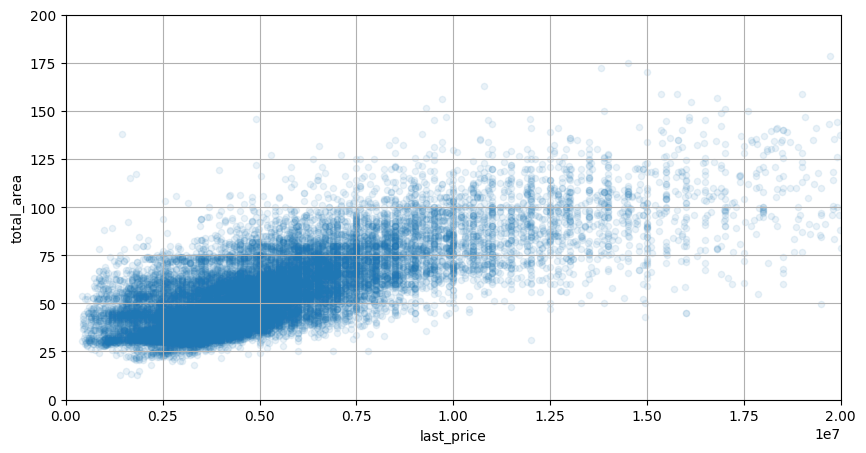

In [192]:
data.plot(x='last_price',
          y='total_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,200),
          xlim=(0,20000000),
          grid=True)
plt.show()

data.plot(x='last_price',
          y='total_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,200),
          xlim=(0,20000000),
          grid=True,
          alpha=0.09)


print('Корреляция цены и площади квартиры:')
display(data['total_area'].corr(data['last_price']).round(2))

**2. Зависимость цены от жилой площади**

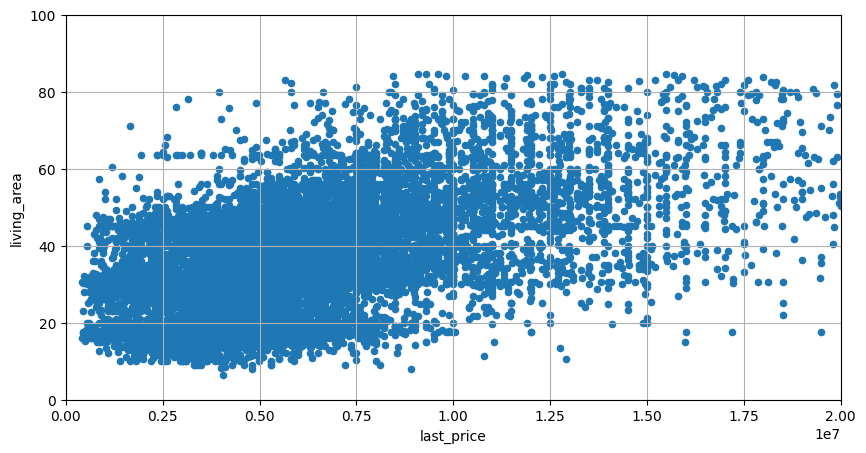

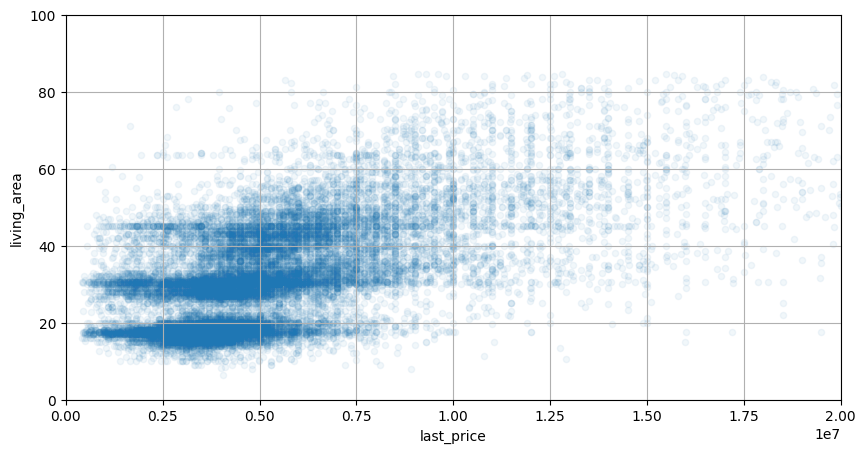

Корреляция цены и жилой площади:


0.61

In [193]:
data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,100),
          xlim=(0,20000000),
          grid=True)
plt.show()

data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,100),
          xlim=(0,20000000),
          grid=True,
          alpha=0.06)

plt.show()
print('Корреляция цены и жилой площади:')
display(data['living_area'].corr(data['last_price']).round(2))

**3. Зависимость цены от площади кухни**

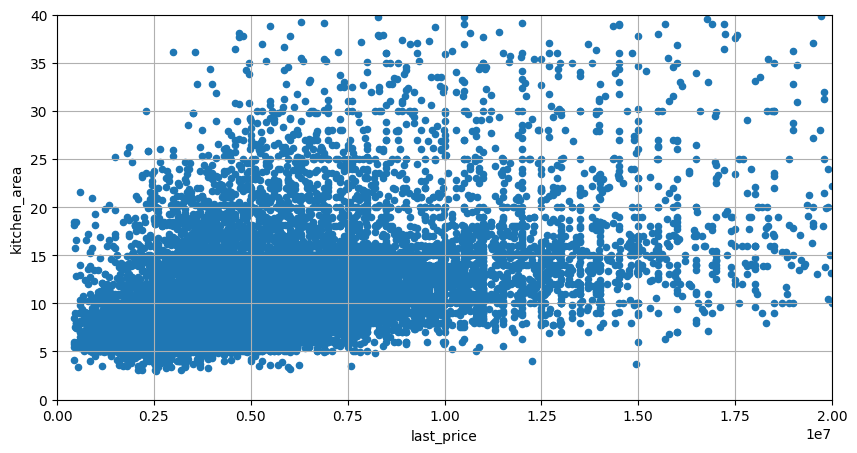

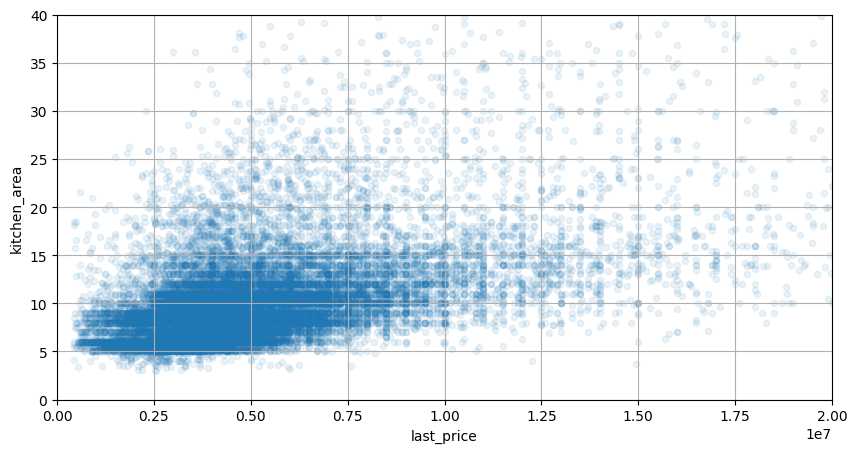

Корреляция цены и площади кухни:


0.48

In [194]:
data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,40),
          xlim=(0,20000000),
          grid=True)
plt.show()

data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          figsize=(10,5),
          ylim=(0,40),
          xlim=(0,20000000),
          grid=True,
          alpha=0.09)
plt.show()
print('Корреляция цены и площади кухни:')
display(data['kitchen_area'].corr(data['last_price']).round(2))

**4. Зависимость цены от количества комнат**

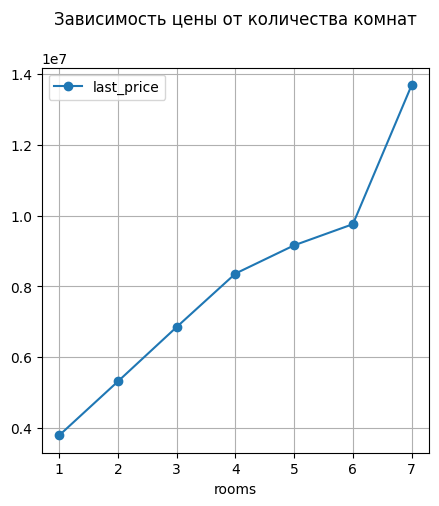

Корреляция цены и количества комнат:


0.46

In [195]:
data_rooms_price = data.pivot_table(index='rooms', values='last_price')
data_rooms_price.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от количества комнат' + "\n" )
plt.show()
print('Корреляция цены и количества комнат:')
display(data['rooms'].corr(data['last_price']).round(2))

**5.1 Зависимость цены от дня размещения**

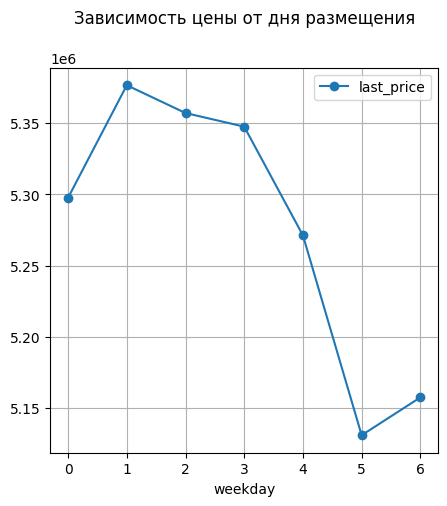

In [196]:
data_weekday_price = data.pivot_table(index='weekday', values='last_price')
data_weekday_price.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от дня размещения' + "\n" )

plt.show()

**5.2 Зависимость цены от месяца размещения**

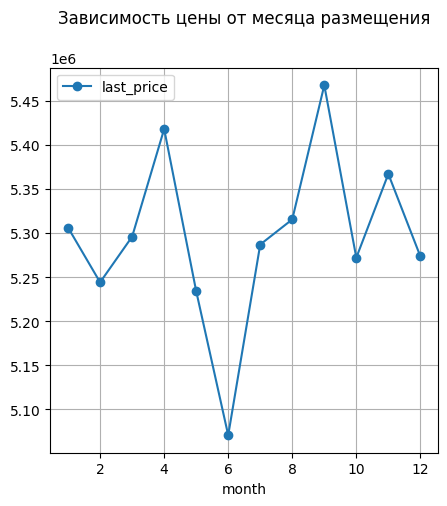

In [197]:
data_month_price = data.pivot_table(index='month', values='last_price')
data_month_price.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от месяца размещения' + "\n" )
plt.show()

**5.3 Зависимость цены от года размещения**

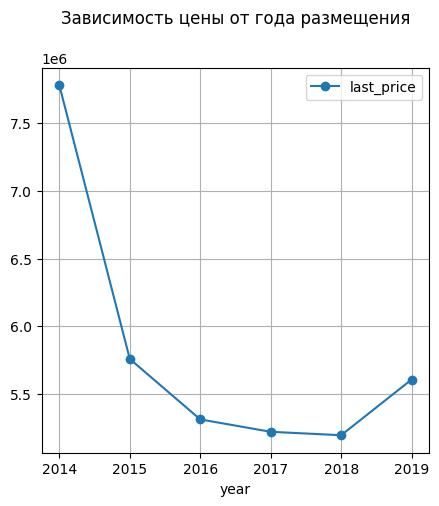

In [198]:
data_year_price = data.pivot_table(index='year', values='last_price')
data_year_price.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от года размещения' + "\n" )
plt.show()

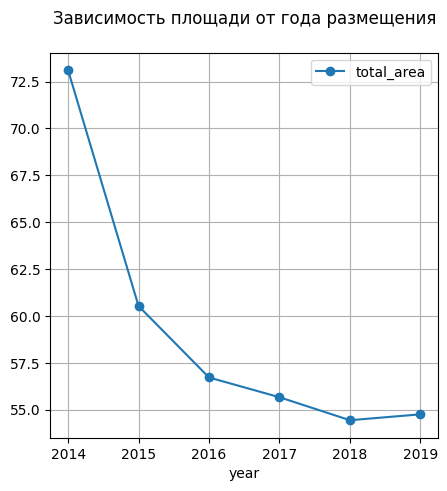

In [199]:
#Подготовим сводную таблицу и построим график, чтобы посмотреть
#какая зависимость между годом размещения и площадью
data_year_total_area = data.pivot_table(index='year', values='total_area')
data_year_total_area.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость площади от года размещения' + "\n" )
plt.show()

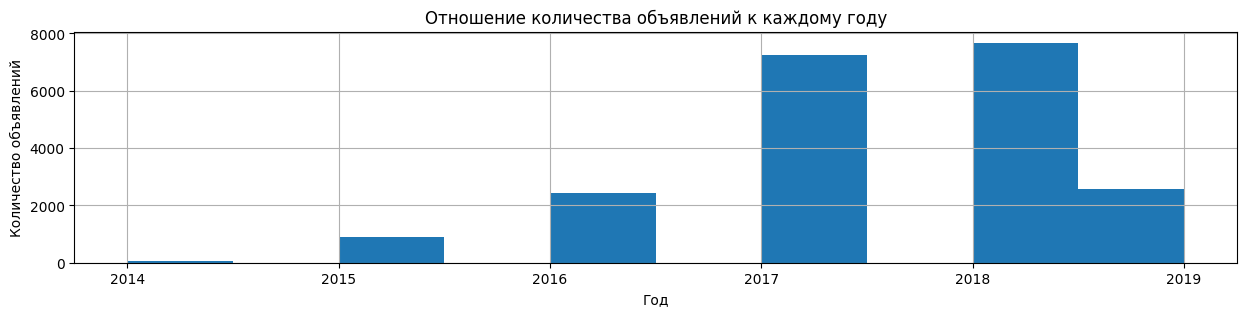

In [200]:
data['year'].hist(figsize=(15,3))
plt.title('Отношение количества объявлений к каждому году')
plt.xlabel('Год')
plt.ylabel('Количество объявлений');

**6. Зависимость цены от типа этажа (первый, другой, последний)**

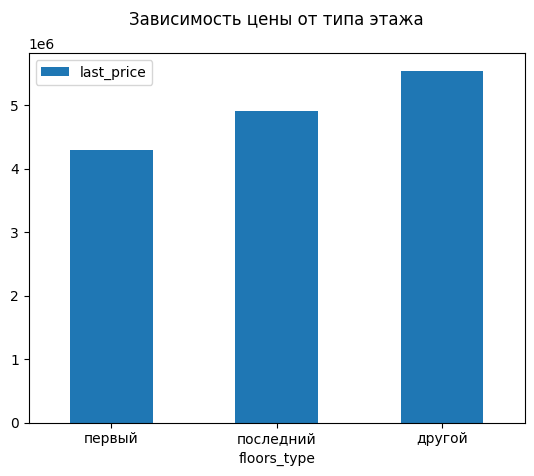

In [201]:
data_floors_type_price = data.pivot_table(index='floors_type', values='last_price').sort_values(by='last_price')
data_floors_type_price.plot(kind='bar')
plt.title('Зависимость цены от типа этажа' + '\n')
plt.xticks(rotation=360)
plt.show()


Из графика выявили, что цена квартиры тесно связана с общей площадью. Так же это подтверждает коэффициент корреляции = 0,75.
    
Цена квартиры зависит от жилой площади немного больше (коэффициент корреляции = 0,61), чем от площади кухни (коэффициент корреляции = 0,58).
    
Есть зависимость цены от количества комнат, но она не слишком сильная (коэффициент корреляции = 0,46)
    
Из графика видно, что зависимость цены от дня размещения не прослеживается. Есть некоторые тенденции. Например, квартиры размещённые по понедельникам по цене выше. Но может больше размещали квартиры с большей площадью.
    
 Так же график показывает, что нет прямой зависимости цены от месяца размещения. Но из графика можно сделать вывод, что пик роста цены приходится на сентябрь. Может это связано с тем, что отпускной сезон подходит к концу, и рынок недвижимости начинается просыпаться.
    
Нет прямой зависимости цены от года размещения. Можно только отметить сильный спад по ценам c каждым годом. Ситуация стабилизировалась только в интервал 2018-2019гг. Для более детального анализа спада построили ещё 2 графика - "Зависимость площади от года размещения" и "Отношение количества объявлений к каждому году". По графику "Зависимость площади от года размещения" тоже наблюдается спад. А по графику "Отношение количества объявлений к каждому году" наоборот видно, что с каждым годом количество объявлений растёт. Можно предположить, что в 2014  году Яндекс Недвижимость не была популярной платформой (может о ней мало кто знал). Там размещади объявления больше с дорогой недвижимостью, руководствуясь убеждением, чем в больших источниках разместишь, тем больше шансов на продажу. Далее Яндекс Недвижимость становилася более популяной, что объясняет рост количества объявлений. Здесь стали размещать много квартир более популярного метража и цены.
    
Из графика видно, что цена квартиры выше, если это не первый и не последний этаж. Видимо, квартиры на первых этажах из-за наличия возможности заглядывать в окна, менее популярны и стоят дешевле всего.

### Населённые пункты с самой высокой и самой низкой стоимостью квадратного метра в  топ-10 городах.

In [202]:
#Выбираем топ-10 населённых пунктов по количеству объявлений
top_10 = data['locality_name'].value_counts().head(10)
top_10

,count
locality_name,
Санкт-Петербург,13436
посёлок Мурино,507
посёлок Шушары,426
Всеволожск,375
Пушкин,335
Колпино,323
посёлок Парголово,319
деревня Кудрово,277
Гатчина,277


In [203]:
#Выбираем из датафрейма строки только с нужными населёнными пунктами
data_top_10 = data.query('locality_name in @top_10.index')
#Формируем новую сводную таблицу - населённый пункт/стоимость 1 квадратного метра
data_top_10 = data_top_10.pivot_table(index='locality_name', values='one_meter_price').astype(int)
#Сортируем таблицу в порядке убывания
data_top_10.sort_values(by='one_meter_price', ascending = False)

,one_meter_price
locality_name,
Санкт-Петербург,109143
Пушкин,101984
деревня Кудрово,92342
посёлок Парголово,90507
посёлок Мурино,85080
посёлок Шушары,78302
Колпино,75371
Гатчина,68993
Всеволожск,67494


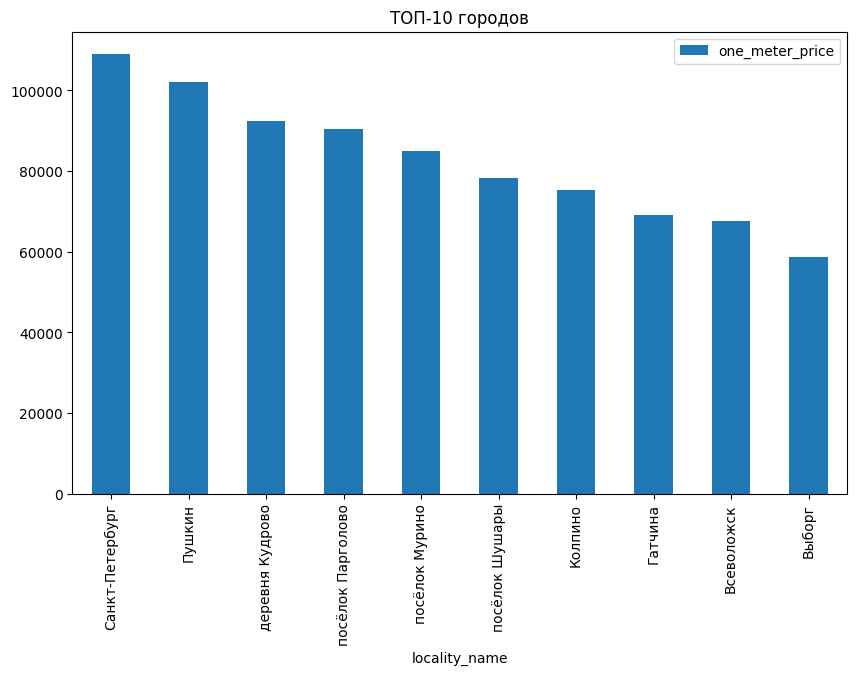

In [204]:
data_top_10.sort_values(by='one_meter_price', ascending = False).plot(kind='bar', figsize=(10,6));
plt.title('ТОП-10 городов');

Наибольшая стоимость квадратного метра, ожидаемо, в Санкт-Петербурге (108711 руб/м). Затем идёт город
Пушкин (101819 руб/м). Это может быть связано с несколькими факторами - близость к Санкт_Петербургу, близость к
аэропорту, с низкоэтажной застройкой и большим количеством музейно-парковых комплексов.
Следующим по стоимости идёт Кудрово (92297 руб/м). Скорее всего очень прельщает, что Кудрово
находится внутри КАД.

Меньше всего квадратный метр стоит в городе Выборге (58141 руб/м). Наверное, главный минус
этого уютного городка с красивой природой - это удалённость от Санкт-Петербурга.

### Влияние расстояния до центра на стоимость объекта.

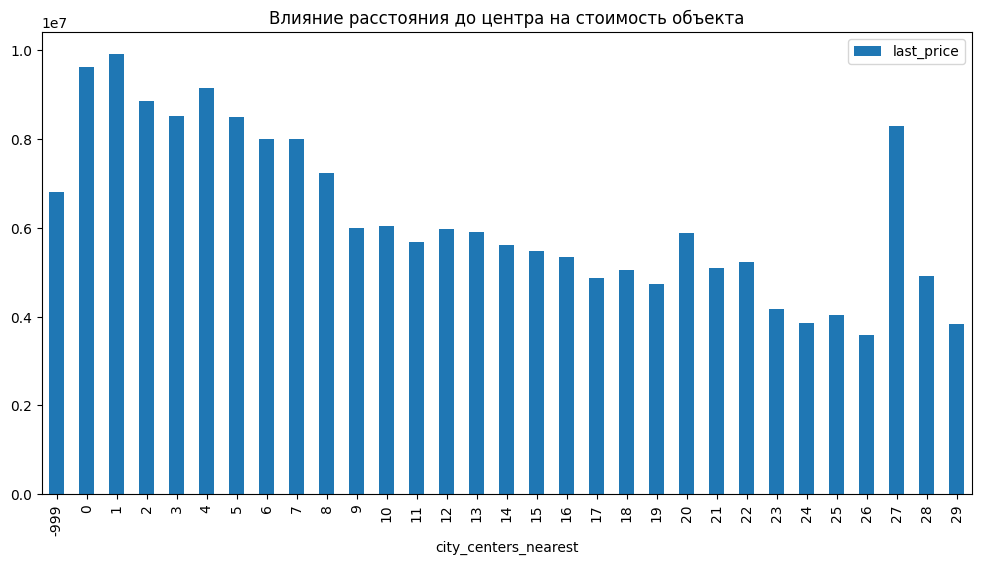

In [205]:
#Избавляемся от пропущенных значений, чтобы они не мешали расчётам
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0).astype(int)
data_centers = data.query('locality_name=="Санкт-Петербург"').pivot_table(index='city_centers_nearest', values='last_price')

data_centers.plot(kind='bar', figsize=(12,6))
plt.title('Влияние расстояния до центра на стоимость объекта');

In [206]:
#Сделаем срез - какие населённые пункты находятся на 27 км и стоимость>8000000
display(data.query('city_centers_nearest==27 and last_price>8000000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_meter_price,weekday,month,year,floors_type
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1.0,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой
2776,8,10500000.0,105.0,2017-12-06,4,3.12,3.0,76.3,1,False,...,1.0,169.0,0.0,NaN,-555.0,100000.00,2,12,2017,первый
2948,23,11350000.0,75.0,2017-08-15,3,3.50,2.0,52.7,2,False,...,3.0,216.0,3.0,153.0,207.0,151333.33,1,8,2017,последний
8997,11,13000000.0,100.0,2019-03-28,3,2.65,4.0,56.0,2,False,...,2.0,522.0,2.0,444.0,-555.0,130000.00,3,3,2019,другой
12466,11,15000000.0,89.6,2017-01-31,3,2.65,3.0,57.0,3,False,...,3.0,317.0,3.0,509.0,357.0,167410.71,1,1,2017,последний
15578,20,16000000.0,101.9,2018-01-08,2,2.87,4.0,48.1,1,False,...,2.0,273.0,3.0,368.0,-555.0,157016.68,0,1,2018,первый
22037,15,10900000.0,145.0,2017-04-17,2,3.50,2.0,39.0,2,False,...,3.0,216.0,3.0,153.0,188.0,75172.41,0,4,2017,последний


Из данных сделали срез, который соответсвует двум условиям - расстояние до центра города 27 км и цена квартиры 8000000 руб.
Получили выборку, в которой надо обратить внимание на название населённого пункта - Пушкин. В Пушкине стоимость
квадратного метра почти равна стоимости квадратного метра в Петербурге. Поэтому на графике появился пик на 27 км.

In [207]:
#Подготовим сводную таблицу, где будет указано, сколько квартир продавалось на каждом км от центра С-Пб
dcf_1= (
    data.query('locality_name=="Санкт-Петербург"').
    pivot_table(index='city_centers_nearest', values='first_day_exposition', aggfunc='count').reset_index()
)

display(dcf_1.head())

,city_centers_nearest,first_day_exposition
0,-999,38
1,0,50
2,1,163
3,2,211
4,3,397


In [208]:
#Подготовим сводную таблицу, где будет указано, квартиры на каких этажах продавались в зависимости от удалённости от центра
dcf_2= (
    data.query('locality_name=="Санкт-Петербург"').
    pivot_table(index='city_centers_nearest', columns='floors_type', values='living_area', aggfunc='count').reset_index()
)

display(dcf_2.head())

floors_type,city_centers_nearest,другой,первый,последний
0,-999,31.0,3.0,4.0
1,0,31.0,5.0,14.0
2,1,91.0,31.0,41.0
3,2,119.0,36.0,56.0
4,3,253.0,60.0,84.0


In [209]:
#Объединим две сводные таблицы методом merge
dcf_3 = dcf_2.merge(dcf_1)
display(dcf_3.head())

,city_centers_nearest,другой,первый,последний,first_day_exposition
0,-999,31.0,3.0,4.0,38
1,0,31.0,5.0,14.0,50
2,1,91.0,31.0,41.0,163
3,2,119.0,36.0,56.0,211
4,3,253.0,60.0,84.0,397


In [210]:
# Посчитаем долю, которую занимает каждая категория (первый, последний, другой)
dcf_3["attitude_another"] = ((dcf_3['другой'] / dcf_3['first_day_exposition'])*100).round(0)
dcf_3["attitude_first"] = ((dcf_3['первый'] / dcf_3['first_day_exposition'])*100).round(0)
dcf_3["attitude_tail"] = ((dcf_3['последний'] / dcf_3['first_day_exposition'])*100).round(0)
dcf_3 = dcf_3.rename(columns={'другой':'another', 'первый':'first', 'последний':'tail','first_day_exposition':'summa'})

dcf_3

,city_centers_nearest,another,first,tail,summa,attitude_another,attitude_first,attitude_tail
0,-999,31.0,3.0,4.0,38,82.0,8.0,11.0
1,0,31.0,5.0,14.0,50,62.0,10.0,28.0
2,1,91.0,31.0,41.0,163,56.0,19.0,25.0
3,2,119.0,36.0,56.0,211,56.0,17.0,27.0
4,3,253.0,60.0,84.0,397,64.0,15.0,21.0
5,4,500.0,73.0,89.0,662,76.0,11.0,13.0
6,5,415.0,65.0,81.0,561,74.0,12.0,14.0
7,6,262.0,36.0,56.0,354,74.0,10.0,16.0
8,7,276.0,32.0,40.0,348,79.0,9.0,11.0
9,8,450.0,52.0,69.0,571,79.0,9.0,12.0


По графику 'Влияние расстояния до центра на стоимость объекта' видно, что наблюдается чёткая тенденция по снижению цены. Чем дальше от центра, тем ниже стоимость квартиры.

Но это снижение происходит ступенчато. Мы наоблюдаем небольшие пики. Они могут быть связаны с тем, что на этом расстоянии больше продалось квартир с типом жилья 'другой' (они по цене дороже, чем квартиры на 1м и последнем этажах), относительно квартир с типом этажа 'первый' и 'последний'. Например, пик на 4м км. 76% - квартиры с типом этажа 'другой', 11% - квартиры с типом этажа 'первый', 13% - квартиры с типом этажа 'последний'.
    
Самый высокий пик мы наблюдаем на 27 км. Там находится Пушкин. Стоимость квадратного метра там почти такая же, что и в С-Пб. Отсюда и скачок.

### Oбщий вывод

<div class="alert alert-block alert-info"

   Самая высокая стоимость квадратного метра в Санкт-Петербурге  - 108711 руб. Чем ближе к центру города, тем выше цена за объект. Кроме города Пушкина (27 км от центра города). Там стоимость квадратного метра примерно равна квадратному метру в г. С-Пб - 101984 руб. А так же замечено,что больше квартир продаётся на расстоянии от центра города - 10-18 км. Это может быть связано с более доступной ценой.  

   Наибольшее влияние на стоимость квартиры оказывает общая(полная) площадь. Чем больше квартира, тем выше на неё цена. Коэффикиент корреляции - 0,75. Так же покупателей интересует жилая площадь и площадь кухни. Прослеживается положительная корреляция - 0,61 и 0,58.
     
  Прямой зависимости цены квартиры от года, месяца и дня размещения нет. Но можно обратить внимание на пики, что в апреле и особенно в сентябре стоимость квартиры наиболее высока, относительно других месяцев.

  Среднее время продажи квартиры - 93 дня. Бывают случаи более быстрой продажи (в течение 40 дней) и необычно долгой продажи - более 225 дней.
  
  Больше всего квартир продаётся в пятиэтажных домах, далее в девятиэтажных. Скорее всего большинство из них относится к вторичному фонду. Потому что новостройки в основном строят выше (начиная от 10-15 этажей). В высотках (новостройках) самые популярные дома, где продают квартиры - 25 этажей. Скорее всего их чаще строят, чем дома в 30 этажей.
    
  В данных в названии населённого пункта было много неявных дубликатов. Можно эту графу сделать обязательной для заполнения и автоматизированной, чтобы человек не вручную заносил данные, а выбирал из списка предложенных.